In [1]:
import pandas as pd
df_ABT = pd.read_csv('ABT_GUSTAVO.csv', index_col=0)

df_ABT.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_MISS,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,LE_OCCUPATION_TYPE,LE_ORGANIZATION_TYPE,target
0,-0.577538,0.142129,-0.478095,-0.166149,-0.507465,-0.149452,1.506880,-0.456215,0.379837,0.579154,...,0,0,1,0,0,1,0,8,5,1
1,-0.577538,0.426792,1.725450,0.592677,1.600698,-1.252750,-0.166821,-0.460115,1.078697,1.790855,...,0,0,0,0,0,1,0,3,39,0
2,-0.577538,-0.427196,-1.152888,-1.404676,-1.092389,-0.783451,-0.689509,-0.453299,0.206116,0.306869,...,0,0,0,0,1,0,0,8,11,0
3,-0.577538,-0.142533,-0.711430,0.177869,-0.653696,-0.928991,-0.680114,-0.473217,-1.375829,0.369143,...,0,0,0,0,1,0,0,8,5,0
4,-0.577538,-0.199466,-0.213734,-0.361755,-0.068772,0.563570,-0.892535,-0.473210,0.191639,-0.307263,...,0,0,0,0,1,0,0,3,37,0


In [7]:
len(df_ABT)

307511

In [ ]:
CRIAR BASE DE TREINO E TESTE

In [14]:
from sklearn.model_selection import train_test_split

explicativas = df_ABT.drop(['target'], axis=1)
resposta = df_ABT["target"]

x_train, x_test, y_train, y_test = train_test_split(explicativas, resposta, test_size = 0.32, random_state = 0)

In [15]:
# Vamos verificar quantidade de linhas e colunas das tabelas geradas:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((209107, 175), (98404, 175), (209107,), (98404,))

In [ ]:
RANDOM FOREST

In [16]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier


rndforest = RandomForestClassifier(n_estimators=10, 
                                   criterion='gini', 
                                   max_depth=3, 
                                   min_samples_split=2, 
                                   min_samples_leaf=1, 
                                   min_weight_fraction_leaf=0.00, 
                                   max_features='auto', 
                                   max_leaf_nodes=None, 
                                   min_impurity_decrease=0.00, 
                                   min_impurity_split=None, 
                                   bootstrap=True, 
                                   oob_score=False, 
                                   n_jobs=None, 
                                   random_state=None, 
                                   verbose=0, 
                                   warm_start=False, 
                                   class_weight=None)

rndforest.fit(x_train, y_train)

# Treino
y_pred_rndforest_train = rndforest.predict(x_train)
y_score_rndforest_train = rndforest.predict_proba(x_train)[:,1]

# Teste
y_pred_rndforest_test = rndforest.predict(x_test)
y_score_rndforest_test = rndforest.predict_proba(x_test)[:,1]

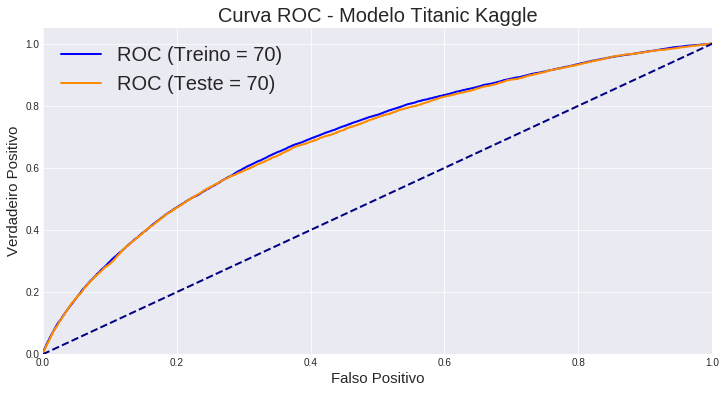

Acurácia, Gini e Área Curva ROC (Base de Treino):  91.88 40.0 70.0
Acurácia, Gini e Área Curva ROC (Base de Teste):  92.04 40.0 70.0


In [13]:
# 1) Cálculo da acurácia
from sklearn.metrics import accuracy_score

#Treino
acc_rndforest_train = round(accuracy_score(y_pred_rndforest_train, y_train) * 100, 2)

#Teste
acc_rndforest_test = round(accuracy_score(y_pred_rndforest_test, y_test) * 100, 2)

# 2) Cálculo da área sob curva ROC e Gini
from sklearn.metrics import roc_curve, auc

# Treino
fpr_rndforest_train, tpr_rndforest_train, thresholds = roc_curve(y_train, y_score_rndforest_train)
roc_auc_rndforest_train = 100*round(auc(fpr_rndforest_train, tpr_rndforest_train), 2)
gini_rndforest_train = 100*round((2*roc_auc_rndforest_train/100 - 1), 2)

# Teste
fpr_rndforest_test, tpr_rndforest_test, thresholds = roc_curve(y_test, y_score_rndforest_test)
roc_auc_rndforest_test = 100*round(auc(fpr_rndforest_test, tpr_rndforest_test), 2)
gini_rndforest_test = 100*round((2*roc_auc_rndforest_test/100 - 1), 2)


# 3) Gráfico da curva ROC
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,6))

lw = 2

plt.plot(fpr_rndforest_train, tpr_rndforest_train, color='blue',lw=lw, label='ROC (Treino = %0.0f)' % roc_auc_rndforest_train)
plt.plot(fpr_rndforest_test, tpr_rndforest_test, color='darkorange',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc_rndforest_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=15)
plt.ylabel('Verdadeiro Positivo', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize=20) 
plt.title('Curva ROC - Modelo Titanic Kaggle', fontsize=20)
plt.show()

print('Acurácia, Gini e Área Curva ROC (Base de Treino): ',acc_rndforest_train, gini_rndforest_train, roc_auc_rndforest_train)
print('Acurácia, Gini e Área Curva ROC (Base de Teste): ',acc_rndforest_test, gini_rndforest_test, roc_auc_rndforest_test)

In [ ]:
REDE NEURAL

In [17]:
# Multi-layer Perceptron classifier
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(hidden_layer_sizes=(100, ),
                    activation='relu', 
                    solver='adam', 
                    alpha=0.01, 
                    batch_size='auto', 
                    learning_rate='constant', 
                    learning_rate_init=0.001, 
                    power_t=0.5, 
                    max_iter=200, 
                    shuffle=True, 
                    random_state=None, 
                    tol=0.0001, 
                    verbose=False, 
                    warm_start=False, 
                    momentum=0.9, 
                    nesterovs_momentum=True,
                    early_stopping=False, 
                    validation_fraction=0.1, 
                    beta_1=0.9, 
                    beta_2=0.999, 
                    epsilon=1e-08,
                    n_iter_no_change=10)


mlp.fit(x_train, y_train)

# Treino
y_pred_mlp_train = mlp.predict(x_train)
y_score_mlp_train = mlp.predict_proba(x_train)[:,1]

# Teste
y_pred_mlp_test = mlp.predict(x_test)
y_score_mlp_test = mlp.predict_proba(x_test)[:,1]

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


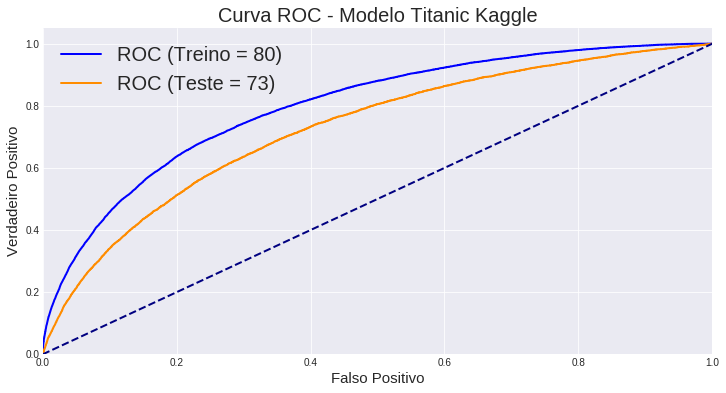

Acurácia, Gini e Área Curva ROC (Base de Treino):  92.05 60.0 80.0
Acurácia, Gini e Área Curva ROC (Base de Teste):  91.93 46.0 73.0


In [21]:
# 1) Cálculo da acurácia
from sklearn.metrics import accuracy_score

#Treino
acc_mlp_train = round(accuracy_score(y_pred_mlp_train, y_train) * 100, 2)

#Teste
acc_mlp_test = round(accuracy_score(y_pred_mlp_test, y_test) * 100, 2)

# 2) Cálculo da área sob curva ROC e Gini
from sklearn.metrics import roc_curve, auc

# Treino
fpr_mlp_train, tpr_mlp_train, thresholds = roc_curve(y_train, y_score_mlp_train)
roc_auc_mlp_train = 100*round(auc(fpr_mlp_train, tpr_mlp_train), 2)
gini_mlp_train = 100*round((2*roc_auc_mlp_train/100 - 1), 2)

# Teste
fpr_mlp_test, tpr_mlp_test, thresholds = roc_curve(y_test, y_score_mlp_test)
roc_auc_mlp_test = 100*round(auc(fpr_mlp_test, tpr_mlp_test), 2)
gini_mlp_test = 100*round((2*roc_auc_mlp_test/100 - 1), 2)


# 3) Gráfico da curva ROC
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,6))

lw = 2

plt.plot(fpr_mlp_train, tpr_mlp_train, color='blue',lw=lw, label='ROC (Treino = %0.0f)' % roc_auc_mlp_train)
plt.plot(fpr_mlp_test, tpr_mlp_test, color='darkorange',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc_mlp_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=15)
plt.ylabel('Verdadeiro Positivo', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize=20) 
plt.title('Curva ROC - Modelo Titanic Kaggle', fontsize=20)
plt.show()

print('Acurácia, Gini e Área Curva ROC (Base de Treino): ',acc_mlp_train, gini_mlp_train, roc_auc_mlp_train)
print('Acurácia, Gini e Área Curva ROC (Base de Teste): ',acc_mlp_test, gini_mlp_test, roc_auc_mlp_test)

XGBoost

In [24]:
import sys
!{sys.executable} -m pip install xgboost
import xgboost as xgb

    100% |████████████████████████████████| 142.8MB 4.6kB/s eta 0:00:01   31% |██████████                      | 44.3MB 52.9MB/s eta 0:00:02
You are using pip version 9.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [33]:
# fit model no training data
model = xgb.XGBClassifier(eta=0.4,
                         max_depth=8)
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, eta=0.4, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [36]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, eta=0.4, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)


In [37]:
# Treino
y_pred_mlp_train = model.predict(x_train)
y_score_mlp_train = model.predict_proba(x_train)[:,1]

# Teste
y_pred_mlp_test = model.predict(x_test)
y_score_mlp_test = model.predict_proba(x_test)[:,1]

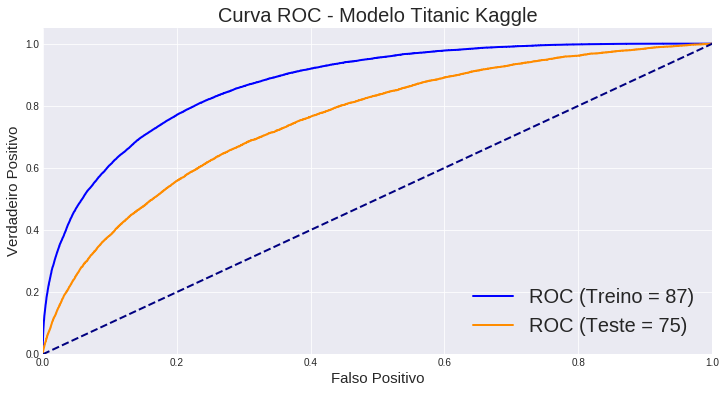

Acurácia, Gini e Área Curva ROC (Base de Treino):  92.36 74.0 87.0
Acurácia, Gini e Área Curva ROC (Base de Teste):  92.01 50.0 75.0


In [38]:
# 1) Cálculo da acurácia
from sklearn.metrics import accuracy_score

#Treino
acc_mlp_train = round(accuracy_score(y_pred_mlp_train, y_train) * 100, 2)

#Teste
acc_mlp_test = round(accuracy_score(y_pred_mlp_test, y_test) * 100, 2)

# 2) Cálculo da área sob curva ROC e Gini
from sklearn.metrics import roc_curve, auc

# Treino
fpr_mlp_train, tpr_mlp_train, thresholds = roc_curve(y_train, y_score_mlp_train)
roc_auc_mlp_train = 100*round(auc(fpr_mlp_train, tpr_mlp_train), 2)
gini_mlp_train = 100*round((2*roc_auc_mlp_train/100 - 1), 2)

# Teste
fpr_mlp_test, tpr_mlp_test, thresholds = roc_curve(y_test, y_score_mlp_test)
roc_auc_mlp_test = 100*round(auc(fpr_mlp_test, tpr_mlp_test), 2)
gini_mlp_test = 100*round((2*roc_auc_mlp_test/100 - 1), 2)


# 3) Gráfico da curva ROC
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,6))

lw = 2

plt.plot(fpr_mlp_train, tpr_mlp_train, color='blue',lw=lw, label='ROC (Treino = %0.0f)' % roc_auc_mlp_train)
plt.plot(fpr_mlp_test, tpr_mlp_test, color='darkorange',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc_mlp_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=15)
plt.ylabel('Verdadeiro Positivo', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize=20) 
plt.title('Curva ROC - Modelo Titanic Kaggle', fontsize=20)
plt.show()

print('Acurácia, Gini e Área Curva ROC (Base de Treino): ',acc_mlp_train, gini_mlp_train, roc_auc_mlp_train)
print('Acurácia, Gini e Área Curva ROC (Base de Teste): ',acc_mlp_test, gini_mlp_test, roc_auc_mlp_test)